In [ ]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append("../..")
import torch
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pickle
from mlstm_kernels.utils.benchmark.plot_results import (
    plot_benchmark_result_table,
    create_runtime_line_plot,
)
from mlstm_kernels.utils.plot.bar_plot import create_double_bar_plot
import seaborn as sns

## Make paper plots

In [2]:
result_filename = "mlstm_tfla_paper_consttoken_benchmark_results.p"

In [3]:
with open(Path(".") / result_filename, "rb") as f:
    all_results_dict = pickle.load(f)

In [4]:
all_runtime_results_fw_df = all_results_dict["runtime"]["fw"]
all_runtime_results_fwbw_df = all_results_dict["runtime"]["fwbw"]

In [5]:
all_memory_results_fw_df = all_results_dict["memory"]["fw"]
all_memory_results_fwbw_df = all_results_dict["memory"]["fwbw"]

In [6]:
all_runtime_results_fwbw_df

,sequence_length,chunkwise--triton_limit_chunk__bfloat16__fwbw__cs-64_nh-8_hdv-512_hdq-256,chunkwise--triton_xl_chunk__bfloat16__fwbw__cs-64_nh-8_hdv-512_hdq-256,chunkwise--triton_xl_chunk__bfloat16__fwbw__cs-128_nh-8_hdv-512_hdq-256,chunkwise--triton_xl_chunk__bfloat16__fwbw__cs-256_nh-8_hdv-512_hdq-256,chunkwise--triton_xl_chunk__bfloat16__fwbw__cs-512_nh-8_hdv-512_hdq-256,chunkwise--triton_xl_chunk__bfloat16__fwbw__cs-1024_nh-8_hdv-512_hdq-256,chunkwise--triton_xl_chunk__bfloat16__fwbw__cs-2048_nh-8_hdv-512_hdq-256,chunkwise--triton_xl_chunk__bfloat16__fwbw__cs-4096_nh-8_hdv-512_hdq-256,chunkwise--triton_xl_chunk_siging__bfloat16__fwbw__cs-64_nh-8_hdv-512_hdq-256_n-False,...,chunkwise--triton_xl_chunk_siging__bfloat16__fwbw__cs-4096_nh-8_hdv-512_hdq-256_n-False,torch_flash__bfloat16__fwbw__nh-32_hdq-128_hdv-128,torch_cudnn__bfloat16__fwbw__nh-32_hdq-128_hdv-128,flashattn3____bfloat16__fwbw__nh-32_hdq-128_hdv-128,chunk_gla____bfloat16__fwbw__nh-8_hdv-512_hdq-256,fused_chunk_gla__bfloat16__fwbw__nh-8_hdv-512_hdq-256,chunk_simple_gla__bfloat16__fwbw__nh-8_hdv-512_hdq-256,mamba____bfloat16__fwbw__nh-1_hdv-8192_hdq-16,mamba2____bfloat16__fwbw__nh-128_hdv-64_hdq-64,mamba2_noconv____bfloat16__fwbw__nh-128_hdv-64_hdq-64
0,512,29.112864,24.063265,20.939104,21.245472,25.248384,NaN,NaN,NaN,22.039776,...,NaN,15.566816,12.501440,12.691744,29.591265,33.697983,16.660929,53.288929,44.275841,193.836380
1,1024,29.259071,24.051680,21.156864,21.490656,24.903105,34.989761,NaN,NaN,21.223137,...,NaN,19.602272,14.577536,13.428832,30.558399,33.938526,17.240671,56.574593,44.125954,258.679657
2,2048,29.125664,24.011295,21.185568,21.252384,25.049185,34.368256,54.034401,NaN,21.145664,...,NaN,28.275105,19.165825,15.704448,30.442017,34.176960,17.321280,60.391457,44.351585,257.586578
3,4096,29.080000,24.320641,21.108641,21.286304,25.105503,34.404831,52.410847,91.833633,21.247648,...,75.962433,50.529537,30.834145,20.339457,30.649471,34.572193,17.382496,59.970879,44.353088,257.688751
4,8192,29.667871,25.588415,21.057568,21.366783,25.184641,34.526497,52.668736,90.766495,21.740255,...,76.881790,96.537476,56.297569,32.287296,30.781471,34.787231,17.532703,62.351681,44.386658,191.752319
5,16384,29.768385,24.837343,21.112415,21.699297,25.654272,34.989727,52.666592,90.973572,21.682337,...,77.023453,190.415451,112.727837,58.329472,30.922367,35.401600,17.684896,62.733536,43.505375,191.654144
6,32768,32.297729,26.888033,20.685663,21.801825,25.752832,35.061890,52.951138,91.029091,23.694304,...,77.323936,376.797638,222.125763,115.284477,31.758144,36.136063,18.009216,63.934879,43.756927,192.114151
7,65536,31.847712,26.361601,21.198879,21.693695,25.718559,35.087585,53.111359,91.075203,23.465729,...,77.324509,749.445374,447.146637,227.002716,31.848032,42.481792,18.602177,65.930977,44.062336,192.001190


In [7]:
all_runtime_results_fwbw_df.filter(
    regex=f"batch_size|sequence_length|.*xl_chunk_siging.*"
)

,sequence_length,chunkwise--triton_xl_chunk_siging__bfloat16__fwbw__cs-64_nh-8_hdv-512_hdq-256_n-False,chunkwise--triton_xl_chunk_siging__bfloat16__fwbw__cs-128_nh-8_hdv-512_hdq-256_n-False,chunkwise--triton_xl_chunk_siging__bfloat16__fwbw__cs-256_nh-8_hdv-512_hdq-256_n-False,chunkwise--triton_xl_chunk_siging__bfloat16__fwbw__cs-512_nh-8_hdv-512_hdq-256_n-False,chunkwise--triton_xl_chunk_siging__bfloat16__fwbw__cs-1024_nh-8_hdv-512_hdq-256_n-False,chunkwise--triton_xl_chunk_siging__bfloat16__fwbw__cs-2048_nh-8_hdv-512_hdq-256_n-False,chunkwise--triton_xl_chunk_siging__bfloat16__fwbw__cs-4096_nh-8_hdv-512_hdq-256_n-False
0,512,22.039776,19.593504,19.334433,22.853760,NaN,NaN,NaN
1,1024,21.223137,18.941696,19.110081,22.103712,30.926847,NaN,NaN
2,2048,21.145664,19.238111,18.883425,22.519457,30.883776,46.050209,NaN
3,4096,21.247648,19.144993,18.920609,22.484896,30.969025,45.771839,75.962433
4,8192,21.740255,18.962688,18.887680,22.608320,31.077024,46.029442,76.881790
5,16384,21.682337,18.701183,18.880192,22.658848,31.113344,46.089890,77.023453
6,32768,23.694304,19.205313,19.424353,23.005983,31.483648,46.483936,77.323936
7,65536,23.465729,19.256416,19.444033,22.976065,31.460800,45.819103,77.324509


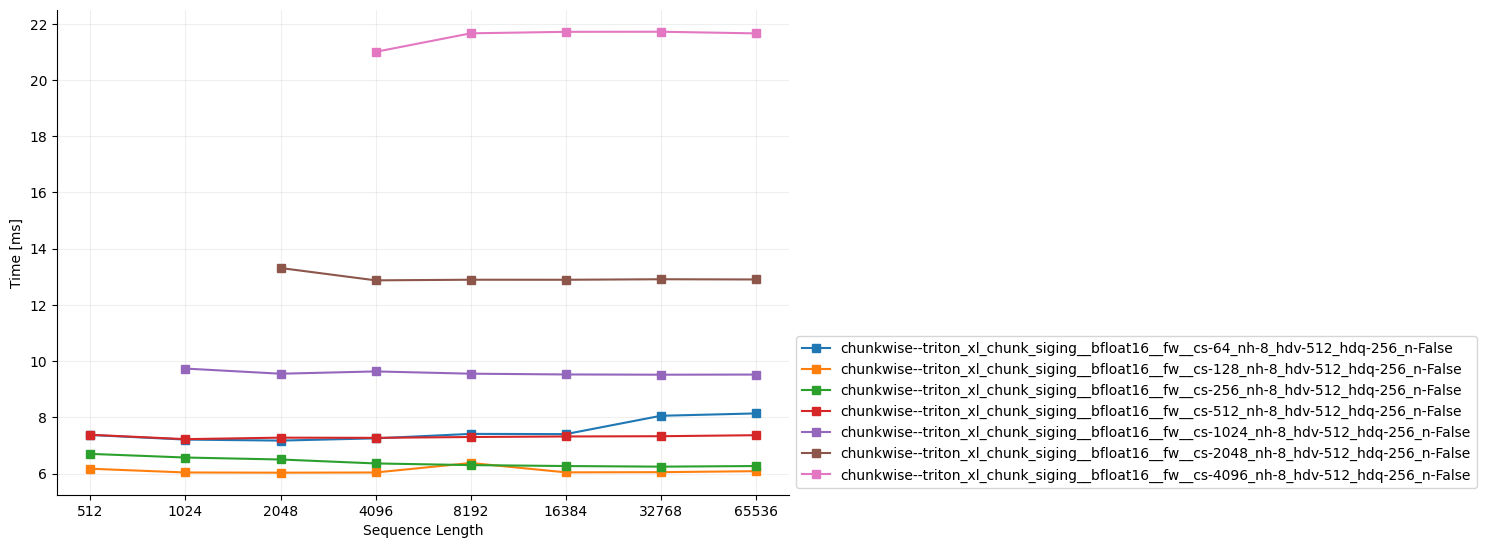

In [8]:
fig = create_runtime_line_plot(
    data_df=all_runtime_results_fw_df.filter(
        regex=r"sequence_length|.*xl_chunk_siging.*"
    ),
    group_col_names=["sequence_length"],
)

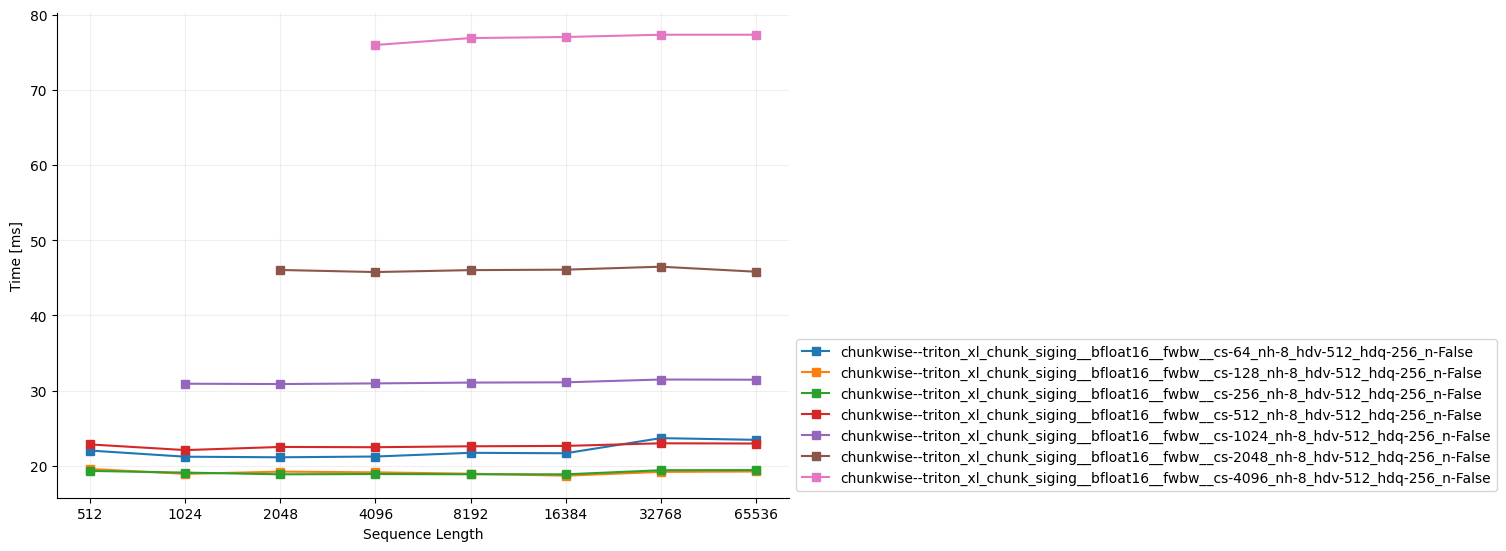

In [9]:
fig = create_runtime_line_plot(
    data_df=all_runtime_results_fwbw_df.filter(
        regex=r"sequence_length|.*xl_chunk_siging.*"
    ),
    group_col_names=["sequence_length"],
)

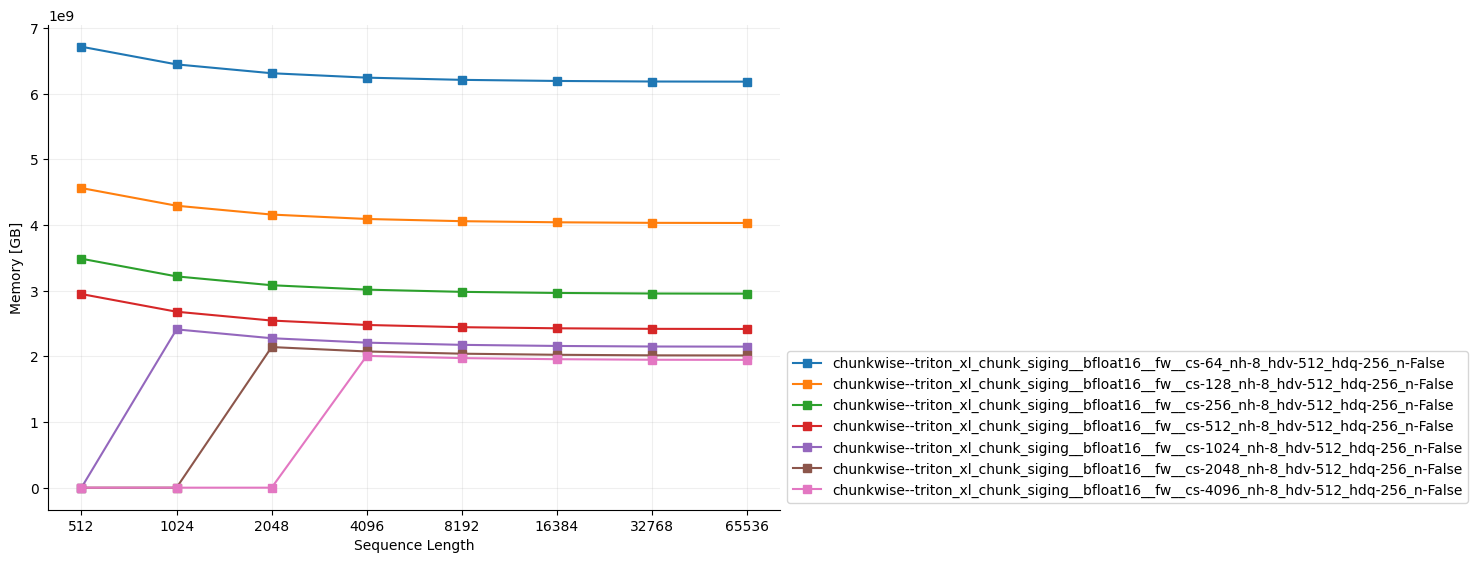

In [10]:
fig = create_runtime_line_plot(
    data_df=all_memory_results_fw_df.filter(
        regex=r"sequence_length|.*xl_chunk_siging.*"
    ),
    group_col_names=["sequence_length"],
    y_label="Memory [GB]",
)

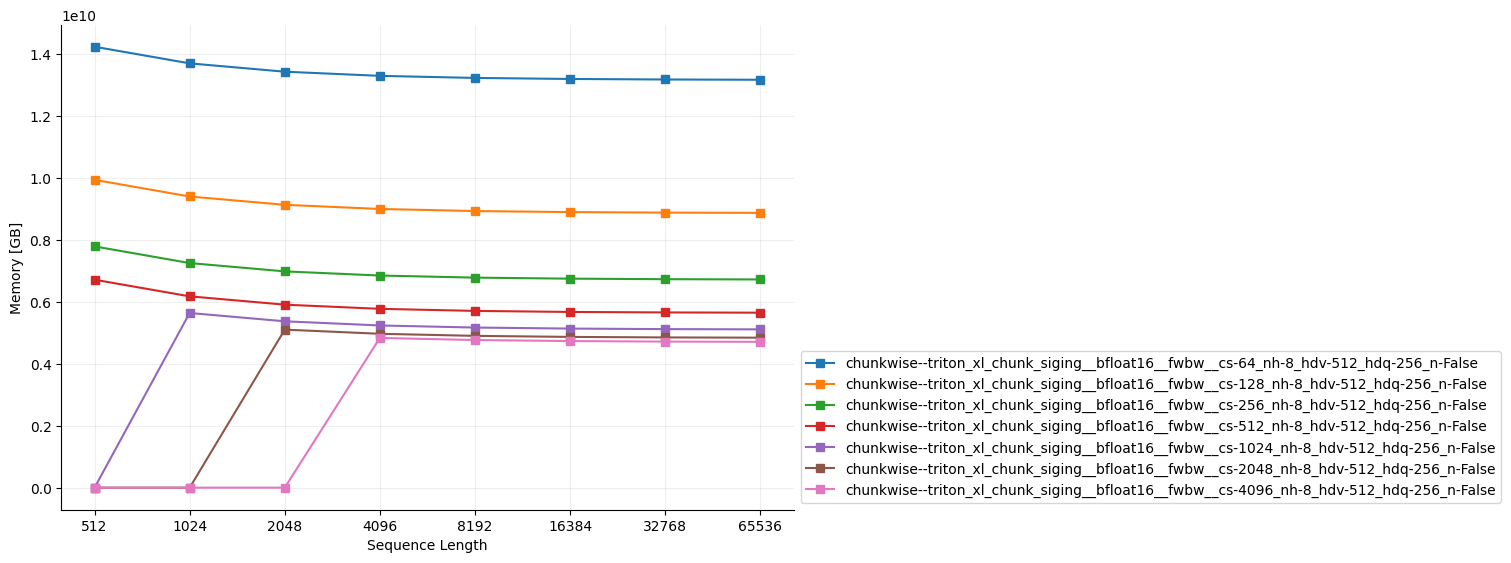

In [11]:
fig = create_runtime_line_plot(
    data_df=all_memory_results_fwbw_df.filter(
        regex=r"sequence_length|.*xl_chunk_siging.*"
    ),
    group_col_names=["sequence_length"],
    y_label="Memory [GB]",
)

In [12]:
def create_memory_runtime_df(
    runtime_df: pd.DataFrame,
    memory_df: pd.DataFrame,
    kernel_name: str = "xl_chunk_siging",
    sequence_length: int = 8192,
) -> pd.DataFrame:
    selected_mlstm_runtime_fwbw_df = runtime_df.filter(
        regex=rf"sequence_length|.*{kernel_name}.*"
    )
    selected_mlstm_memory_fwbw_df = memory_df.filter(
        regex=rf"sequence_length|.*{kernel_name}.*"
    )

    selected_mlstm_runtime_ctx_fwbw_df = (
        selected_mlstm_runtime_fwbw_df[
            selected_mlstm_runtime_fwbw_df["sequence_length"] == sequence_length
        ]
        .drop(columns=["sequence_length"])
        .T
    )
    selected_mlstm_memory_ctx_fwbw_df = (
        selected_mlstm_memory_fwbw_df[
            selected_mlstm_memory_fwbw_df["sequence_length"] == sequence_length
        ]
        .drop(columns=["sequence_length"])
        .T
    )

    def extract_chunksize(specifier: str):
        return int(specifier.split("__")[-1].split("_")[0].split("-")[1])

    runtime_df = selected_mlstm_runtime_ctx_fwbw_df.rename(index=extract_chunksize)
    runtime_df.index.name = "chunk_size"
    runtime_df.columns = ["runtime"]
    runtime_df = runtime_df.reset_index()

    memory_df = selected_mlstm_memory_ctx_fwbw_df.rename(index=extract_chunksize)
    memory_df.index.name = "chunk_size"
    memory_df.columns = ["memory"]
    memory_df = memory_df / 1e9
    memory_df = memory_df.reset_index()

    memory_runtime_df = pd.concat([runtime_df, memory_df], axis=1)
    memory_runtime_df = memory_runtime_df.loc[
        :, ~memory_runtime_df.columns.duplicated()
    ]
    return memory_runtime_df

In [13]:
memory_runtime_fwbw_df = create_memory_runtime_df(
    runtime_df=all_runtime_results_fwbw_df, memory_df=all_memory_results_fwbw_df
)
memory_runtime_fwbw_df

,chunk_size,runtime,memory
0,64,21.740255,13.232195
1,128,18.962688,8.933033
2,256,18.887680,6.783452
3,512,22.608320,5.708662
4,1024,31.077024,5.171267
5,2048,46.029442,4.902569
6,4096,76.881790,4.768220


In [14]:
memory_runtime_fw_df = create_memory_runtime_df(
    runtime_df=all_runtime_results_fw_df, memory_df=all_memory_results_fw_df
)
memory_runtime_fw_df

,chunk_size,runtime,memory
0,64,7.411136,6.208831
1,128,6.376000,4.057154
2,256,6.301056,2.981315
3,512,7.300192,2.443395
4,1024,9.552736,2.174435
5,2048,12.895072,2.039955
6,4096,21.660032,1.972716


In [16]:
from plot_config import get_tb_plot_mpl_context, savefig

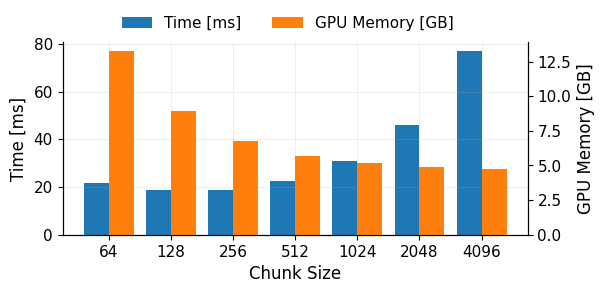

In [17]:
# forward backward
with get_tb_plot_mpl_context(fontsize_delta=-0):
    fig = create_double_bar_plot(
        data=memory_runtime_fwbw_df,
        y_col_left="runtime",
        y_col_right="memory",
        x_col="chunk_size",
        left_color=plt.colormaps["tab10"](0),
        right_color=plt.colormaps["tab10"](1),
        left_label="Time [ms]",
        right_label="GPU Memory [GB]",
        x_label="Chunk Size",
        figsize=(6, 2.5),
        bar_width=0.4,
    )

In [18]:
# savefig(fig=fig, filename="tfla_mlstm_kernel_memory_vs_runtime--paper")

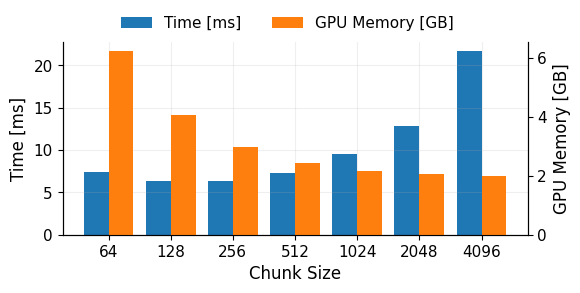

In [19]:
# forward only
with get_tb_plot_mpl_context(fontsize_delta=-0):
    fig = create_double_bar_plot(
        data=memory_runtime_fw_df,
        y_col_left="runtime",
        y_col_right="memory",
        x_col="chunk_size",
        left_color=plt.colormaps["tab10"](0),
        right_color=plt.colormaps["tab10"](1),
        left_label="Time [ms]",
        right_label="GPU Memory [GB]",
        x_label="Chunk Size",
        figsize=(6, 2.5),
        bar_width=0.4,
    )

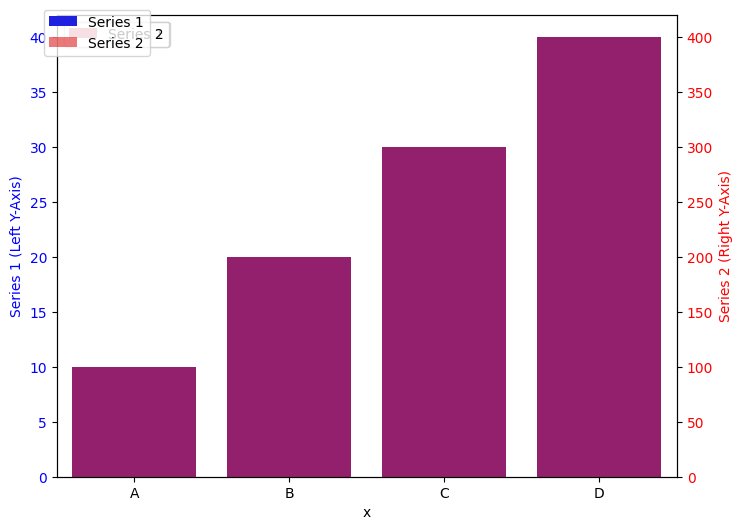

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
x = ["A", "B", "C", "D"]
series1 = [10, 20, 30, 40]  # Data for the left y-axis
series2 = [100, 200, 300, 400]  # Data for the right y-axis

# Create a DataFrame for plotting
df = pd.DataFrame({"x": x, "series1": series1, "series2": series2})

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the first series on the left y-axis
sns.barplot(x="x", y="series1", data=df, color="blue", ax=ax1, label="Series 1")
ax1.set_ylabel("Series 1 (Left Y-Axis)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second series on the right y-axis
sns.barplot(
    x="x", y="series2", data=df, color="red", ax=ax2, alpha=0.6, label="Series 2"
)
ax2.set_ylabel("Series 2 (Right Y-Axis)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

# Show the plot
plt.show()

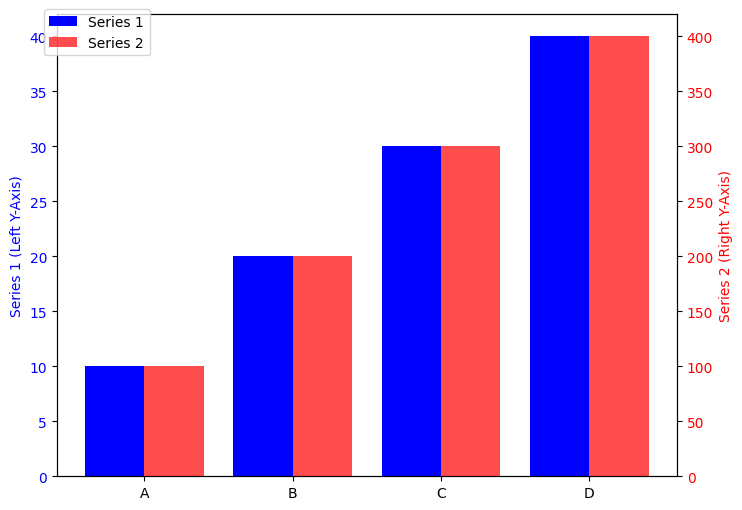

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Sample data
x = ["A", "B", "C", "D"]
series1 = [10, 20, 30, 40]  # Data for the left y-axis
series2 = [100, 200, 300, 400]  # Data for the right y-axis

# Bar width
bar_width = 0.4

# Create positions for the bars
x_positions = np.arange(len(x))

# Initialize the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the first series on the left y-axis
bars1 = ax1.bar(
    x_positions - bar_width / 2, series1, bar_width, color="blue", label="Series 1"
)
ax1.set_ylabel("Series 1 (Left Y-Axis)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_xticks(x_positions)
ax1.set_xticklabels(x)

# Create the second y-axis
ax2 = ax1.twinx()

# Plot the second series on the right y-axis
bars2 = ax2.bar(
    x_positions + bar_width / 2,
    series2,
    bar_width,
    color="red",
    label="Series 2",
    alpha=0.7,
)
ax2.set_ylabel("Series 2 (Right Y-Axis)", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Add a legend
fig.legend(
    [bars1, bars2],
    ["Series 1", "Series 2"],
    loc="upper left",
    bbox_to_anchor=(0.1, 0.9),
)

# Show the plot
plt.show()

In [22]:
# savefig(fig=fig, filename="tfla_mlstm_kernel_benchmark--paper")